In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.qaoa.models.MaxCutProblem import MaxCutProblem

def visualize(data, x,y, hues, chart):
    fig = plt.figure(figsize=(8,6))
    match chart:
        case 'line':
            chart_type = sns.lineplot
        case 'bar':
            chart_type = sns.barplot
        case 'box':
            chart_type = sns.boxplot
        case None:
            chart_type = sns.plot

    # make a copy to avoid modifying the original DataFrame and avoid warnings
    data_to_plot = data.copy()

    try:
        if len(hues) > 1:
            data_to_plot['hues'] = data_to_plot[hues].astype(str).agg('-'.join, axis=1)
            _ = chart_type(data=data_to_plot, x=x, y=y, hue='hues', palette='viridis')
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}', bbox_to_anchor=(1.05, 1), loc='upper left')
        elif len(hues) == 1:
            data_to_plot['hues'] = data_to_plot[hues[0]]
            _ = chart_type(data=data_to_plot, x=x, y=y, hue='hues', palette='viridis')
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            _ = chart_type(data=data_to_plot, x=x, y=y)
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}', bbox_to_anchor=(1.05, 1), loc='upper left')
            #plt.show()

            plt.axhline(y=1, color='red', linestyle='--', linewidth=2)

        plt.axhline(y=1, color='red', linestyle='--', linewidth=2)
        plt.show()
        plt.close(fig)
    except (KeyError, ValueError) as e:
        print(f"You've passed an incorrect column name.\n The correct ones are: \n{data_to_plot.columns}\nException: {e}")


### Configure the results you want to visualize under.

#### Pick multiple hues with ctrl or shift + click.
#### The "Exclude bad" removes the warm started hamming distances of >0 from the dataset.


In [136]:
import ast
import numpy as np



strings = [
    "results/results_papergraph_qaoa_variant_{'multiangle', 'vanilla'}_depth_{2, 4, 6, 8, 10}.csv",
    "results/results_papergraph_depth_{2, 4, 6, 8, 10}_hamming_dist_{2, 4, 6}.csv",
    "results/results_papergraph_depth_{2, 4, 6}_hamming_dist_{2, 4, 6}.csv",
    "results/results_papergraph_depth_{8, 10}_hamming_dist_{2, 4, 6}.csv"
]
strings_ = ["results/results_statevector_HD135_all.csv"]
""", 
,
"results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle','vanilla'},'param_initialization'{'gaussian'},'depth'{1,4},'warm_start'{True},'problem_type'{'minvertexcover'},'lagrangian_multiplier.csv",
"results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle','vanilla'},'param_initialization'{'gaussian'},'depth'{1,4},'warm_start'{False,True},'problem_type'{'minvertexcover'},'lagrangian_mult.csv"
   
    "results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{4},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{4},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{7},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{7},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
"results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle','vanilla'},'param_initialization'{'gaussian'},'depth'{1,4},'warm_start'{True},'problem_type'{'minvertexcover'},'lagrangian_multiplier.csv",
"results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle','vanilla'},'param_initialization'{'gaussian'},'depth'{1,4},'warm_start'{False,True},'problem_type'{'minvertexcover'},'lagrangian_mult.csv"]"""
strings = ["results/results_statevector_HD135_all.csv"]

for file in strings:
    try:
        df = pd.read_csv(file)
        #print(f"File: {file}")
        #print(df['graph_name'].value_counts())
        #print("\n")
    except FileNotFoundError:
        print(f"File not found: {file}")

if len(strings) >1:
    results = pd.concat([pd.read_csv(path,index_col=0) for path in strings])

else:
    results = pd.read_csv(strings[0])



In [97]:

strings = [
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{4},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{4},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{7},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{7},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv"]


def analyze_file_counts(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"\nAnalyzing: {file_path}")
        
        # Extract parameters from filename
        qaoa_variant = "unknown"
        depth = "unknown"
        
        if "'qaoa_variant'" in file_path:
            variant_start = file_path.find("'qaoa_variant'") + len("'qaoa_variant'{")
            variant_end = file_path.find("}", variant_start)
            qaoa_variant = file_path[variant_start:variant_end].replace("'", "")
        
        if "'depth'" in file_path:
            depth_start = file_path.find("'depth'{") + len("'depth'{")
            depth_end = file_path.find("}", depth_start)
            depth = file_path[depth_start:depth_end]
        
        # Group by the relevant columns and count
        if 'hamming_dist' in df.columns:
            grouped = df.groupby(['warm_start', 'hamming_dist', 'graph_name']).size().reset_index(name='count')
        else:
            # If hamming_dist is not in the dataframe, use only warm_start and graph_name
            grouped = df.groupby(['warm_start', 'graph_name']).size().reset_index(name='count')
            # Add a hamming_dist column with NaN values
            grouped['hamming_dist'] = np.nan
        
        # Print the results
        for _, row in grouped.iterrows():
            warm_start = row['warm_start']
            hamming_dist = row['hamming_dist']
            graph_name = row['graph_name']
            count = row['count']
            
            # Format the hamming_dist part of the message
            if pd.isna(hamming_dist):
                hamming_part = ""
            else:
                hamming_part = f", hamming_dist {hamming_dist}"
            
            print(f"For {qaoa_variant} and depth {depth} the combination (warm_start={warm_start}{hamming_part}, graph={graph_name}) has {count} entries and needs {50-count} more.")
        
        return df
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

# Process each file
for file_path in strings:
    analyze_file_counts(file_path)


Analyzing: results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv
For vanilla and depth 1 the combination (warm_start=False, hamming_dist 0, graph=>>graph6<<Emz_) has 50 entries and needs 0 more.
For vanilla and depth 1 the combination (warm_start=False, hamming_dist 0, graph=>>graph6<<Hh_iS_u) has 50 entries and needs 0 more.
For vanilla and depth 1 the combination (warm_start=False, hamming_dist 0, graph=>>graph6<<HmzffJz) has 50 entries and needs 0 more.
For vanilla and depth 1 the combination (warm_start=False, hamming_dist 0, graph=>>graph6<<KmzffJznl{hU) has 50 entries and needs 0 more.
For vanilla and depth 1 the combination (warm_start=True, hamming_dist 0, graph=>>graph6<<Emz_) has 50 entries and needs 0 more.
For vanilla and depth 1 the combination (warm_start=True, hamming_dist 0, graph=>>graph6<<Hh_iS_u) has 50 entries and needs 0 mor

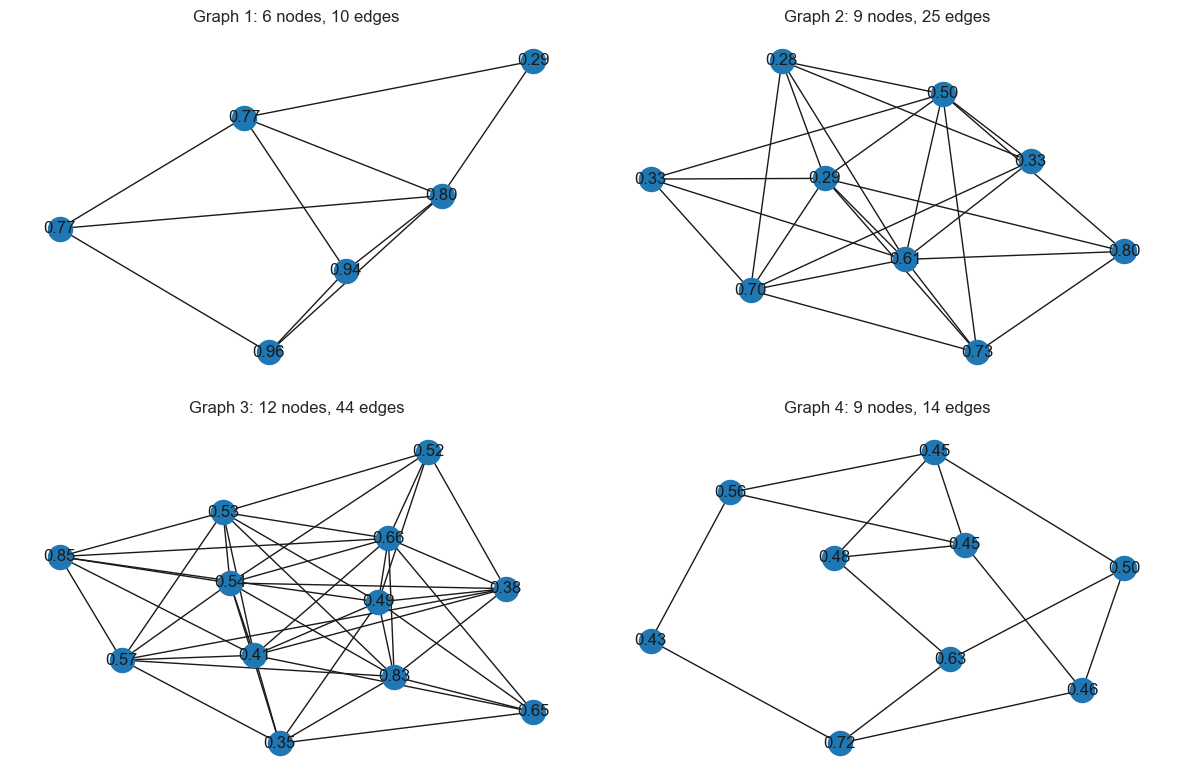

0.7974238714485382
0.7700612176014103
0.956440762925937
0.2947390450335806
0.76789072804424
0.9417981392599122


In [98]:
from rustworkx.visualization import mpl_draw as draw_graph
problem = MaxCutProblem()
graphs = problem.get_erdos_renyi_graphs_paper1()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, figsize=(12, 8))
axes = axes.flatten()

for idx, graph in enumerate(graphs):
    # Create a mapping from node indices to their values to use as labels
    
    draw_graph(graph, ax=axes[idx], with_labels=True, labels=lambda node: f"{node:.2f}")
    axes[idx].set_title(f"Graph {idx+1}")
    # Get the number of nodes and edges for each graph
    # Get the number of nodes and edges for each graph
    for idx, graph in enumerate(graphs):
        num_nodes = len(graph)
        num_edges = len(graph.edge_list())
        axes[idx].set_title(f"Graph {idx+1}: {num_nodes} nodes, {num_edges} edges")

plt.tight_layout()
plt.show()
for n in graphs[0].node_indices():
    print(graphs[0][n])


In [132]:
from src.qaoa.models.solver import MinVertexCoverSolver
import networkx as nx

print(results['graph_name'].value_counts())

for g in graphs:
    # create a networkx graph from the rustworkx graph
    G = nx.Graph(list(g.edge_list()))
    graph6_string = nx.to_graph6_bytes(G).decode("utf-8").strip()
    solver = MinVertexCoverSolver(g, 'minvertexcover')
    mask = results['graph_name'] == graph6_string
    results.loc[results['graph_name'] == graph6_string, 'infeasible']= results.loc[mask, 'quantum_solution'].apply(lambda s: solver.evaluate_bitstring(ast.literal_eval(s),mark_infeasible=True)[1])
    mask_ws = (results['graph_name'] == graph6_string) & (results['warm_start'] == True)
    results.loc[mask_ws, 'ws_value'] = results.loc[mask_ws, 'hamming_string'].apply(
        lambda s: solver.evaluate_bitstring(ast.literal_eval(s.replace(" ",",")), mark_infeasible=True)[0]
    )




"""for index, row in results[mask].iterrows():
    if index == 0:
        continue
    row['infeasible'] = solver.evaluate_bitstring(ast.literal_eval(row['quantum_solution']), mark_infeasible=True)[1]
    results.iloc[index] = row
"""
print(results.groupby('graph_name')['infeasible'].value_counts())

print(results.groupby(['qaoa_variant','lagrangian_multiplier'])['infeasible'].value_counts())



graph_name
>>graph6<<Emz_            2000
>>graph6<<HmzffJz         2000
>>graph6<<Hh_iS_u         2000
>>graph6<<KmzffJznl{hU    2000
Name: count, dtype: int64
graph_name              infeasible
>>graph6<<Emz_          False         1939
                        True            61
>>graph6<<Hh_iS_u       False         1976
                        True            24
>>graph6<<HmzffJz       False         1756
                        True           244
>>graph6<<KmzffJznl{hU  False         1796
                        True           204
Name: count, dtype: int64
qaoa_variant  lagrangian_multiplier  infeasible
multiangle    2                      False         4000
vanilla       2                      False         3467
                                     True           533
Name: count, dtype: int64


In [100]:
from ipywidgets import interact, interactive_output, widgets, HBox, VBox
import matplotlib.pyplot as plt
import ast, pandas as pd

# --- basic controls ----------------------------------------------------------
graph_names = ['All'] + results['graph_name'].unique().tolist()
y_options   = ['ratio', 'time_elapsed', 'quantum_func_evals', 'percent_measure_optimal']
x_options   = ['qaoa_variant', 'depth', 'hamming_dist', 'warm_start',
               'lagrangian_multiplier','backend_mode']
hue_options = x_options.copy()
chart_types = ['bar', 'line', 'box']
ws_options  = [False, True]

graph_dd   = widgets.Dropdown(options=graph_names,  description='Graph:')
x_dd       = widgets.Dropdown(options=x_options,     description='X axis:')
y_dd       = widgets.Dropdown(options=y_options,     description='Y axis:')
hues_ms    = widgets.SelectMultiple(options=hue_options, description='Hues:')
chart_dd   = widgets.Dropdown(options=chart_types,   description='Chart:')
ws_dd      = widgets.Dropdown(options=ws_options,    description='Exclude WS?')

# --- helper to build one "filter row" ----------------------------------------
all_cols   = results.columns.tolist()
ops        = ['>', '>=', '<', '<=', '==', '!=']

def make_filter_row(i: int):
    """Return widgets for a single filter row."""
    enable   = widgets.Checkbox(value=False, description=f'Filter {i}')
    col      = widgets.Dropdown(options=all_cols, description='Column')
    op       = widgets.Dropdown(options=ops,      description='Op')
    val      = widgets.Text(description='Value')
    return enable, col, op, val

flt1_enable, flt1_col, flt1_op, flt1_val = make_filter_row(1)
flt2_enable, flt2_col, flt2_op, flt2_val = make_filter_row(2)

filter_box = VBox([
    HBox([flt1_enable, flt1_col, flt1_op, flt1_val]),
    HBox([flt2_enable, flt2_col, flt2_op, flt2_val])
])

# --- function that actually draws -------------------------------------------
def _apply_single_filter(df, enable, col, op, val):
    """Apply one filter if `enable` is True."""
    if not enable or col not in df.columns:
        return df  # skip invalid filters

    try:
        # Try evaluating the value as a Python literal
        val = ast.literal_eval(val)
    except (ValueError, SyntaxError):
        try:
            # Fallback: coerce to column's dtype
            val = df[col].dtype.type(val)
        except Exception:
            pass  # Leave it as-is if all else fails

    expr = f"`{col}` {op} @val"
    return df.query(expr)


def update_visualization(graph_name, x, y, hues, chart,
                         exclude_warmstart,
                         # filter-1 widgets
                         f1_en, f1_col, f1_op, f1_val,
                         # filter-2 widgets
                         f2_en, f2_col, f2_op, f2_val):
    
    # --- start with the selected graph(s) ------------------------------------
    if graph_name == 'All':

        df = results.copy() 
    else:
        df = results[results['graph_name'] == graph_name].copy()
    
    # --- built-in warm-start exclusion ---------------------------------------
    if exclude_warmstart:
        df = df[df['hamming_dist'] == 0]
    
    # --- apply the two optional filters --------------------------------------
    df = _apply_single_filter(df, f1_en, f1_col, f1_op, f1_val)
    df = _apply_single_filter(df, f2_en, f2_col, f2_op, f2_val)
    
    # --- tidy + call your plotting helper ------------------------------------
    if hues:
        df = df.sort_values(by=[x] + list(hues))
    visualize(df, x=x, y=y, hues=list(hues), chart=chart)

# --- wire everything up ------------------------------------------------------
ui = VBox([
    HBox([graph_dd, x_dd, y_dd]),
    HBox([hues_ms, chart_dd, ws_dd]),
    filter_box
])

out = interactive_output(
    update_visualization,
    {
        'graph_name': graph_dd, 'x': x_dd, 'y': y_dd, 'hues': hues_ms,
        'chart': chart_dd, 'exclude_warmstart': ws_dd,
        
        # pipe the widgets for the two filters
        'f1_en': flt1_enable, 'f1_col': flt1_col, 'f1_op': flt1_op, 'f1_val': flt1_val,
        'f2_en': flt2_enable, 'f2_col': flt2_col, 'f2_op': flt2_op, 'f2_val': flt2_val
    }
)

display(ui, out)


Output()

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_656\1296249785.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=infeasible_pct, x='hamming_dist', y='perc_infeasible', ax=axes[0], palette='viridis')
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_656\1296249785.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ws, x='hamming_dist', y='ratio', ax=axes[1], palette='viridis')
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_656\1296249785.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ws, x='hamming_dist', y='perc_i

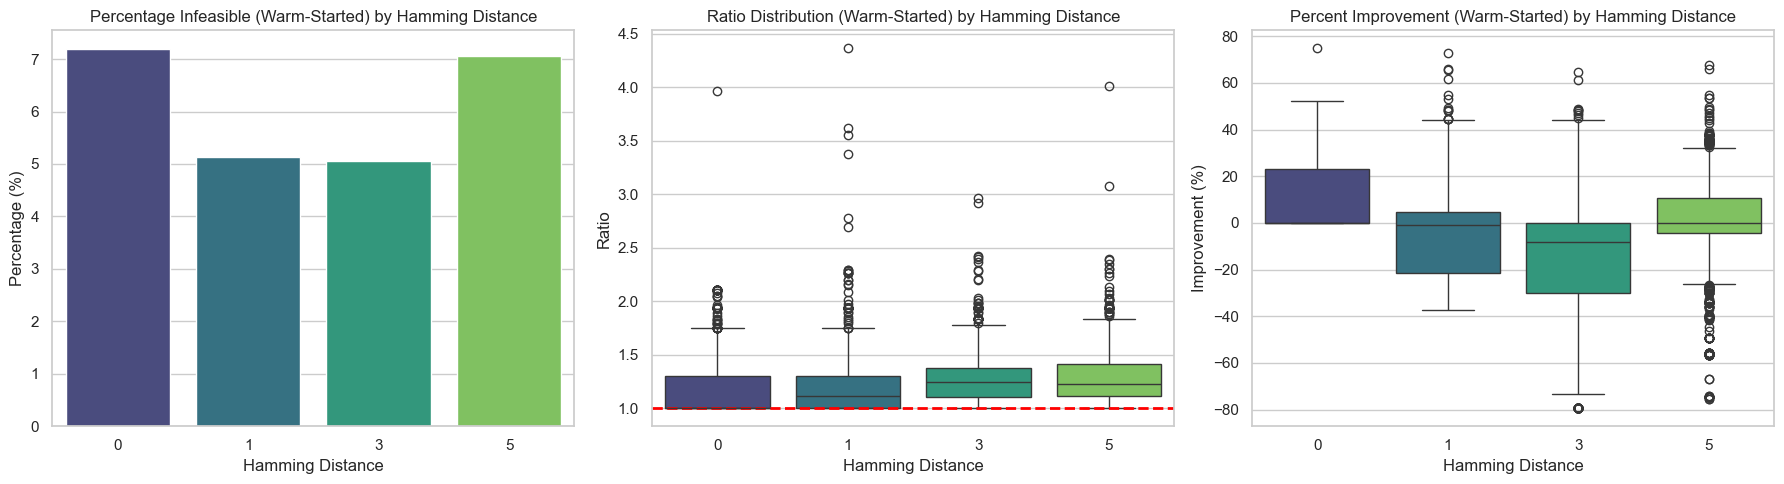

In [101]:
# Filter to only warm-started entries
df_ws = results[results['warm_start'] == True].copy()

# Ensure 'infeasible' is boolean (it might be stored as a string)
df_ws['infeasible_bool'] = df_ws['infeasible'].astype(str).str.lower() == 'true'

# Group by hamming distance to compute percentage of infeasible runs
infeasible_pct = (
    df_ws.groupby('hamming_dist')['infeasible_bool']
    .mean()
    .reset_index(name='perc_infeasible')
)
infeasible_pct['perc_infeasible'] *= 100

# Compute percent improvement from the warm-started string.
# Here we define percent improvement as the relative reduction:
# 100 * (quantum_obj_value - ws_value) / quantum_obj_value.
# Exclude any rows with zero quantum_obj_value or missing ws_value.
df_ws = df_ws[(df_ws['quantum_obj_value'] != 0) & (df_ws['ws_value'].notnull())].copy()
df_ws['ws_value'] = df_ws['ws_value'].astype(float)  # ensure numeric
df_ws['perc_improvement'] = 100 * (df_ws['quantum_obj_value'] - df_ws['ws_value']) / df_ws['quantum_obj_value']

# Create a 1x3 figure: one for % infeasible, one for ratio, and one for % improvement by hamming distance.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1) Plot percentage infeasible by hamming distance
sns.barplot(data=infeasible_pct, x='hamming_dist', y='perc_infeasible', ax=axes[0], palette='viridis')
axes[0].set_title('Percentage Infeasible (Warm-Started) by Hamming Distance')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xlabel('Hamming Distance')

# 2) Plot distribution of ratio values by hamming distance
sns.boxplot(data=df_ws, x='hamming_dist', y='ratio', ax=axes[1], palette='viridis')
axes[1].set_title('Ratio Distribution (Warm-Started) by Hamming Distance')
axes[1].set_ylabel('Ratio')
axes[1].set_xlabel('Hamming Distance')
axes[1].axhline(1, color='red', linestyle='--', linewidth=2)

# 3) Plot percent improvement from the warm-started string by hamming distance
sns.boxplot(data=df_ws, x='hamming_dist', y='perc_improvement', ax=axes[2], palette='viridis')
axes[2].set_title('Percent Improvement (Warm-Started) by Hamming Distance')
axes[2].set_ylabel('Improvement (%)')
axes[2].set_xlabel('Hamming Distance')

plt.tight_layout()
plt.show()

Distribution of depth and variants in the dataset:
qaoa_variant  depth  lagrangian_multiplier
multiangle    1      1                        499
                     2                        500
                     4                        500
                     10                       500
              4      1                        500
                     2                        500
                     4                        500
                     10                       500
vanilla       1      1                        389
                     2                        328
                     4                        438
                     10                       421
              4      1                        400
                     2                        483
                     4                        485
                     10                       467
dtype: int64


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_656\1657031993.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['QAOA Implementation'] = subset.apply(lambda row: f"{row['qaoa_variant'].capitalize()} and Depth: {row['depth']}", axis=1)


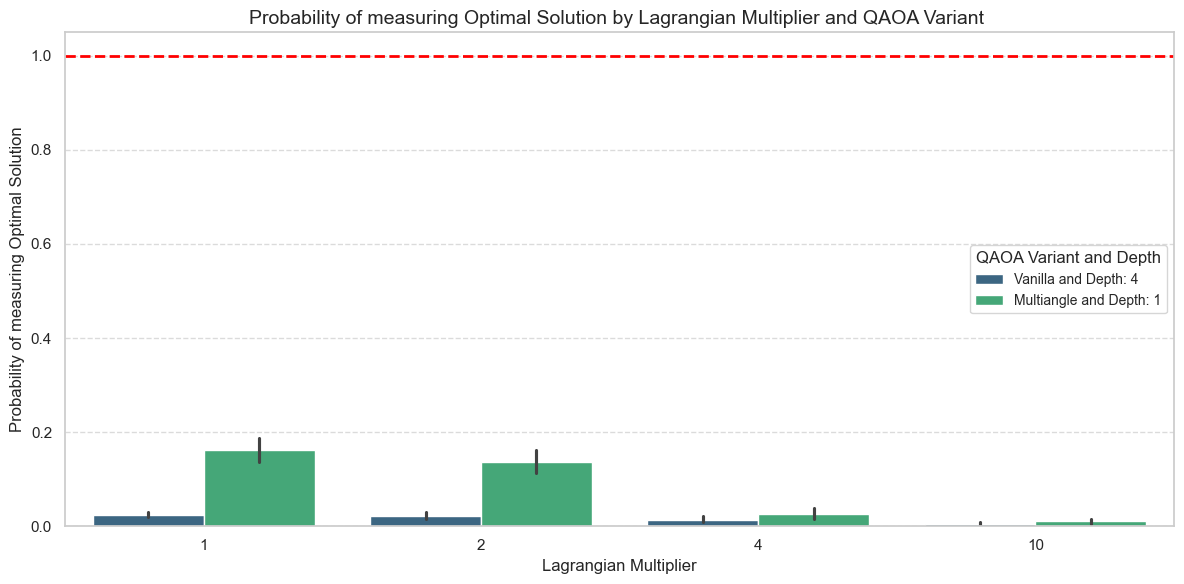

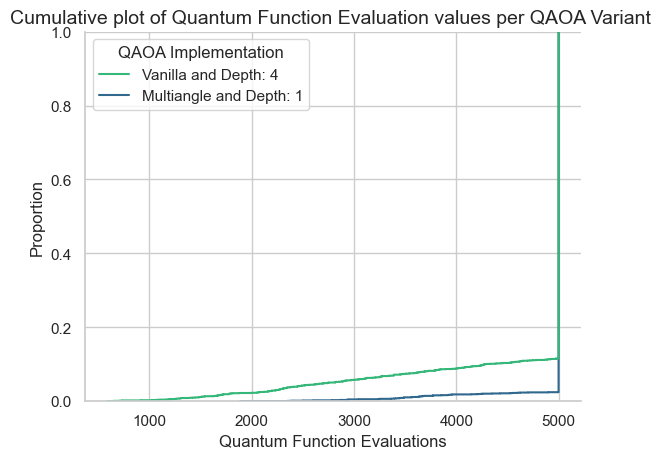

In [129]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette="colorblind")
# Create a visualization to analyze solution ratio by lagrangian multiplier and qaoa variant
plt.figure(figsize=(12, 6))



# Filter only feasible solutions
feasible_df = results[results['infeasible'] == False].copy()

# For better analysis, let's group the data by variant, lagrangian multiplier and depth
# This will give us a clearer picture of how these factors affect solution quality

# Let's analyze what depth & variants are available in our dataset
print("Distribution of depth and variants in the dataset:")
print(feasible_df.groupby(['qaoa_variant', 'depth','lagrangian_multiplier']).size())

# Focus on a subset with specific depths that provide a good comparison point
# Keep only depth 1 for multiangle and depth 4 for vanilla for fair comparison
subset = feasible_df[
    ((feasible_df['qaoa_variant'] == 'multiangle') & (feasible_df['depth'] == 1)) | 
    ((feasible_df['qaoa_variant'] == 'vanilla') & (feasible_df['depth'] == 4))
]

# Create a new column that combines variant and depth for better labeling
subset['QAOA Implementation'] = subset.apply(lambda row: f"{row['qaoa_variant'].capitalize()} and Depth: {row['depth']}", axis=1)

# Create the barplot
sns.barplot(data=subset, x='lagrangian_multiplier', y='percent_measure_optimal', hue='QAOA Implementation', palette='viridis')


# Add horizontal line at ratio=1 to indicate optimal solution quality
plt.axhline(y=1, color='red', linestyle='--', linewidth=2)

# Customize the plot
plt.title('Probability of measuring Optimal Solution by Lagrangian Multiplier and QAOA Variant ', fontsize=14)
plt.xlabel('Lagrangian Multiplier', fontsize=12)
plt.ylabel('Probability of measuring Optimal Solution', fontsize=12)
plt.legend(title='QAOA Variant and Depth', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('lagrangian_percentoptimal_depth1_4.pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()

print(subset.groupby(['qaoa_variant','depth'])['quantum_func_evals'])

sns.ecdfplot(data= subset, x = 'quantum_func_evals' , hue='QAOA Implementation', palette='viridis_r')
plt.title('Cumulative plot of Quantum Function Evaluation values per QAOA Variant ', fontsize=14)
sns.despine()
plt.xlabel('Quantum Function Evaluations', fontsize= 12)
plt.savefig('lagrangian_ecdfplot.pdf', bbox_inches='tight')

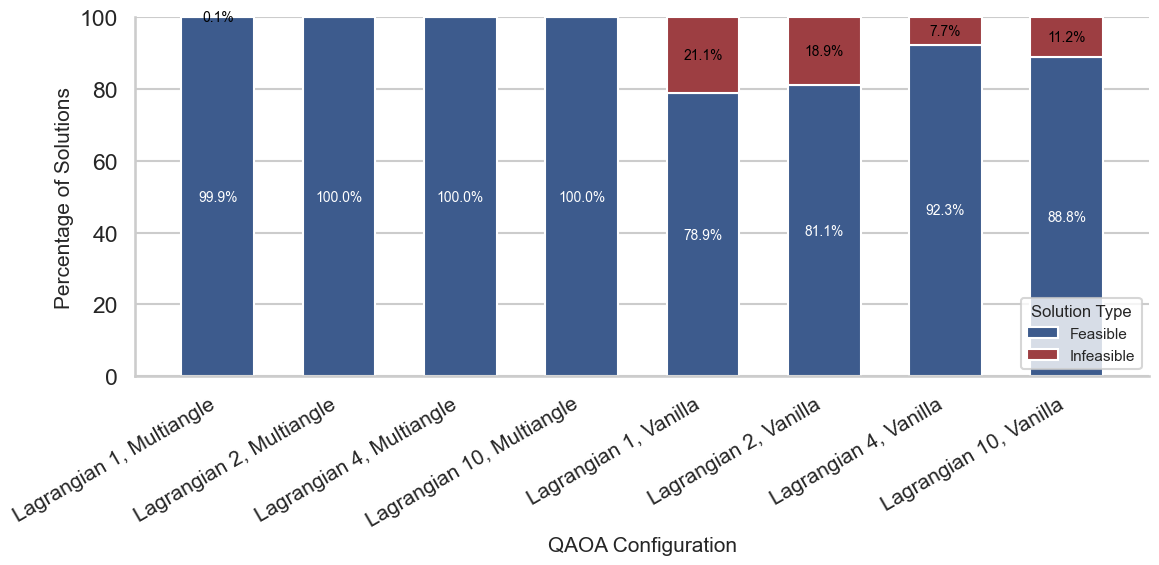

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Data prep ---
df_analysis = results.copy()
df_analysis['infeasible_bool'] = df_analysis['infeasible'].astype(str) == 'True'

# Group by config and count
grouped = df_analysis.groupby(['qaoa_variant', 'lagrangian_multiplier',  'infeasible_bool']).size().reset_index(name='count')

# Pivot to wide format
pivot_df = grouped.pivot_table(
    index=['qaoa_variant', 'lagrangian_multiplier', ],
    columns='infeasible_bool',
    values='count',
    fill_value=0
).reset_index()

# Rename for clarity
pivot_df.rename(columns={False: 'feasible', True: 'infeasible'}, inplace=True)

# Calculate percentages
pivot_df['total'] = pivot_df['feasible'] + pivot_df['infeasible']
pivot_df['feasible_pct'] = pivot_df['feasible'] / pivot_df['total'] * 100
pivot_df['infeasible_pct'] = pivot_df['infeasible'] / pivot_df['total'] * 100

# Custom labels for x-axis
pivot_df['label'] = pivot_df.apply(lambda row: f"Lagrangian {row['lagrangian_multiplier']}, {row['qaoa_variant'].capitalize()}", axis=1)

# --- Plotting ---
sns.set_theme(style="whitegrid", context="talk")
colors = {'Feasible': '#3D5B8D', 'Infeasible': '#9D3E42'}

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(pivot_df))
width = 0.6

# Plot feasible bar base
bars1 = ax.bar(x, pivot_df['feasible_pct'], width, label='Feasible', color=colors['Feasible'])

# Plot infeasible on top
bars2 = ax.bar(x, pivot_df['infeasible_pct'], width, bottom=pivot_df['feasible_pct'], 
               label='Infeasible', color=colors['Infeasible'])

# Add percentage labels
for i, row in pivot_df.iterrows():
    if row['feasible_pct'] > 0:
        ax.text(x[i], row['feasible_pct'] / 2, f"{row['feasible_pct']:.1f}%", ha='center', va='center', fontsize=10, color='white')
    if row['infeasible_pct'] > 0:
        ax.text(x[i], row['feasible_pct'] + row['infeasible_pct'] / 2, f"{row['infeasible_pct']:.1f}%", ha='center', va='center', fontsize=10, color='Black')
# Axes and title
ax.set_xticks(x)
ax.set_xticklabels(pivot_df['label'], rotation=30, ha='right', fontsize=15)
ax.set_ylabel("Percentage of Solutions", fontsize=15)
ax.set_xlabel("QAOA Configuration", fontsize=15)
ax.set_ylim(0, 100)

# Red dashed baseline at 100% (optional)

# Legend and style
ax.legend(title="Solution Type", fontsize=11, title_fontsize=12, loc="lower right")
sns.despine()
plt.tight_layout()
plt.savefig('lagrangian_comparison.pdf', bbox_inches='tight')

plt.show()


In [105]:
results['improvement'] = results['quantum_obj_value'] - results['hamming_obj_func']
#results[results['ws_value'] < results['quantum_obj_value']][['quantum_obj_value', 'ws_value']]
#print(results[results['ws_value'] < results['quantum_obj_value']][['quantum_obj_value', 'ws_value']])
print("Improvement column info:")
print(results['improvement'].describe())

Improvement column info:
count    6400.000000
mean        0.084759
std         0.978942
min        -2.200612
25%        -0.475322
50%         0.000000
75%         0.392658
max        14.533198
Name: improvement, dtype: float64


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_656\3001705371.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([lbl.get_text().capitalize() for lbl in axes[0].get_xticklabels()])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_656\3001705371.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([lbl.get_text().capitalize() for lbl in axes[1].get_xticklabels()])


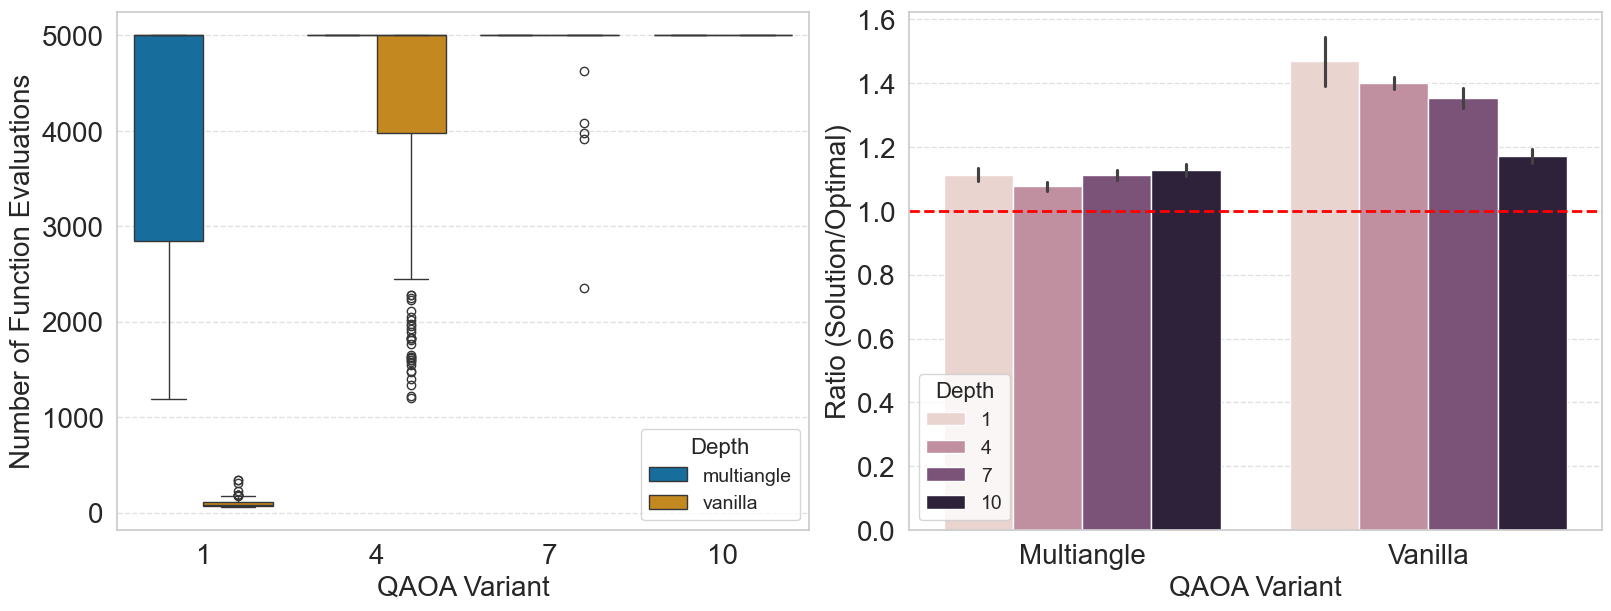

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
df = results.copy()


df = df[df['warm_start'] == False]
df = df[df['infeasible'] == False]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# First subplot - Quantum Function Evaluations
sns.boxplot(data=df, x="depth", y="quantum_func_evals", hue="qaoa_variant", ax=axes[0])
axes[0].set_xlabel("QAOA Variant", fontsize=20)
axes[0].set_ylabel("Number of Function Evaluations", fontsize=20)
axes[0].tick_params(axis='y', labelsize=20)
axes[0].tick_params(axis='x', labelsize=20)
axes[0].legend(title="Depth", title_fontsize=16, fontsize=14)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.6)
axes[0].set_xticklabels([lbl.get_text().capitalize() for lbl in axes[0].get_xticklabels()])

# Second subplot - Solution Quality
sns.barplot(data=df, x="qaoa_variant", y="ratio", hue="depth", ax=axes[1])
axes[1].set_xlabel("QAOA Variant", fontsize=20)
axes[1].set_ylabel("Ratio (Solution/Optimal)", fontsize=20)
axes[1].tick_params(axis='y', labelsize=20)
axes[1].tick_params(axis='x', labelsize=20)
axes[1].legend(title="Depth", title_fontsize=16, fontsize=14)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.6)
axes[1].set_xticklabels([lbl.get_text().capitalize() for lbl in axes[1].get_xticklabels()])

# Add a horizontal red line at y=1 for the ratio plot to indicate optimal solution
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=2)

plt.savefig('CS_metrics.pdf', format='pdf', bbox_inches='tight')
plt.show()

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_656\3035474629.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().capitalize() for label in ax.get_xticklabels()], fontsize=14)


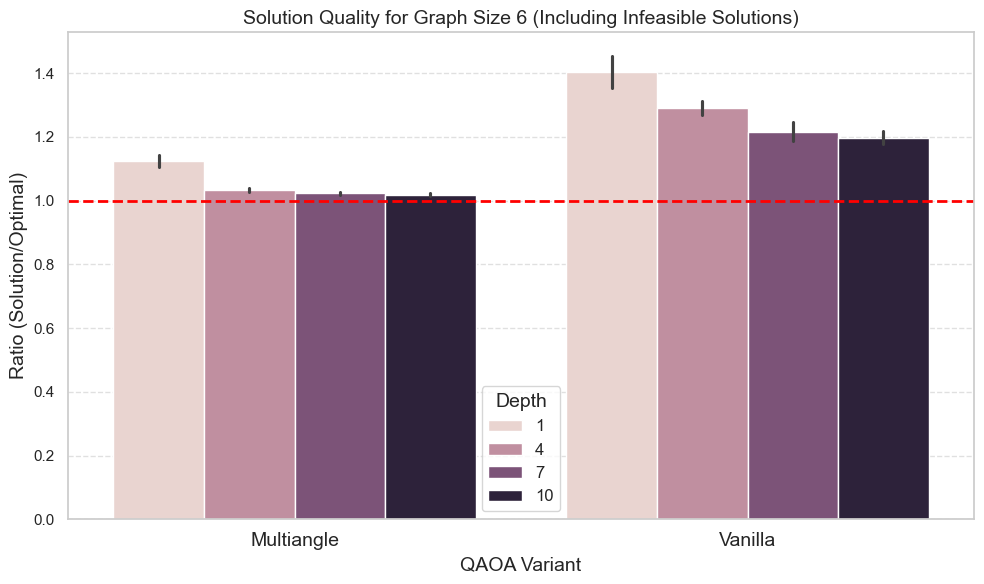

In [ ]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

# Filter only graph size 6 data
df_size_6 = results[results['graph_size'] == 6].copy()

# Create figure
plt.figure(figsize=(10, 6))

# Set theme
sns.set_theme(style="whitegrid", palette="colorblind")

# Plot data
sns.barplot(data=df_size_6, x="qaoa_variant", y="ratio", hue="depth")

# Add horizontal line at ratio=1
plt.axhline(y=1, color='red', linestyle='--', linewidth=2)

# Customize plot
plt.title("Solution Quality for Graph Size 6 (Including Infeasible Solutions)", fontsize=14)
plt.xlabel("QAOA Variant", fontsize=14)
plt.ylabel("Ratio (Solution/Optimal)", fontsize=14)
plt.legend(title="Depth", title_fontsize=14, fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
ax = plt.gca()
ax.set_xticklabels([label.get_text().capitalize() for label in ax.get_xticklabels()], fontsize=14)



plt.tight_layout()
#plt.savefig('CS_infeasible_smallgraph.pdf',bbox_inches='tight')

plt.show()

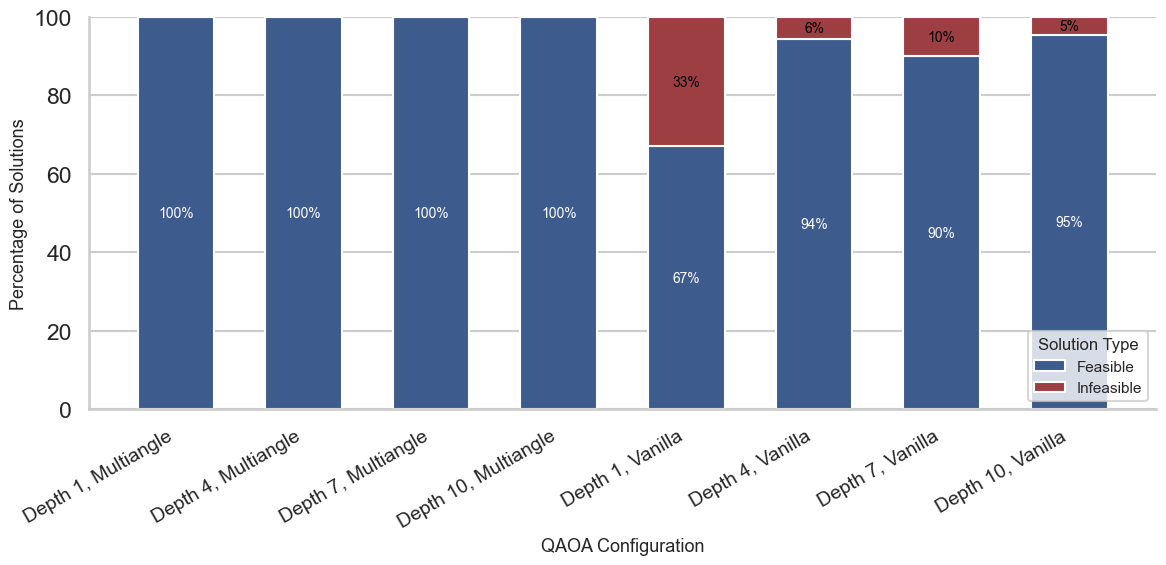

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Data prep ---
df_analysis = results.copy()
df_analysis['infeasible_bool'] = df_analysis['infeasible'].astype(str) == 'True'

# Group by config and count
grouped = df_analysis.groupby(['qaoa_variant', 'depth',  'infeasible_bool']).size().reset_index(name='count')

# Pivot to wide format
pivot_df = grouped.pivot_table(
    index=['qaoa_variant', 'depth', ],
    columns='infeasible_bool',
    values='count',
    fill_value=0
).reset_index()

# Rename for clarity
pivot_df.rename(columns={False: 'feasible', True: 'infeasible'}, inplace=True)

# Calculate percentages
pivot_df['total'] = pivot_df['feasible'] + pivot_df['infeasible']
pivot_df['feasible_pct'] = pivot_df['feasible'] / pivot_df['total'] * 100
pivot_df['infeasible_pct'] = pivot_df['infeasible'] / pivot_df['total'] * 100

# Custom labels for x-axis
pivot_df['label'] = pivot_df.apply(lambda row: f"Depth {row['depth']}, {row['qaoa_variant'].capitalize()}", axis=1)

# --- Plotting ---
sns.set_theme(style="whitegrid", context="talk")
colors = {'Feasible': '#3D5B8D', 'Infeasible': '#9D3E42'}

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(pivot_df))
width = 0.6

# Plot feasible bar base
bars1 = ax.bar(x, pivot_df['feasible_pct'], width, label='Feasible', color=colors['Feasible'])

# Plot infeasible on top
bars2 = ax.bar(x, pivot_df['infeasible_pct'], width, bottom=pivot_df['feasible_pct'], 
               label='Infeasible', color=colors['Infeasible'])

# Add percentage labels
for i, row in pivot_df.iterrows():
    if row['feasible_pct'] > 0:
        ax.text(x[i], row['feasible_pct'] / 2, f"{row['feasible_pct']:.0f}%", ha='center', va='center', fontsize=10, color='white')
    if row['infeasible_pct'] > 0:
        ax.text(x[i], row['feasible_pct'] + row['infeasible_pct'] / 2, f"{row['infeasible_pct']:.0f}%", ha='center', va='center', fontsize=10, color='black')
# Axes and title
ax.set_xticks(x)
ax.set_xticklabels(pivot_df['label'], rotation=30, ha='right', fontsize=14)
ax.set_ylabel("Percentage of Solutions", fontsize=13)
ax.set_xlabel("QAOA Configuration", fontsize=13)
ax.set_ylim(0, 100)

# Red dashed baseline at 100% (optional)

# Legend and style
ax.legend(title="Solution Type", fontsize=11, title_fontsize=12, loc="lower right")
sns.despine()
plt.tight_layout()
plt.savefig('CS_feasible_percent.pdf', bbox_inches='tight')

plt.show()


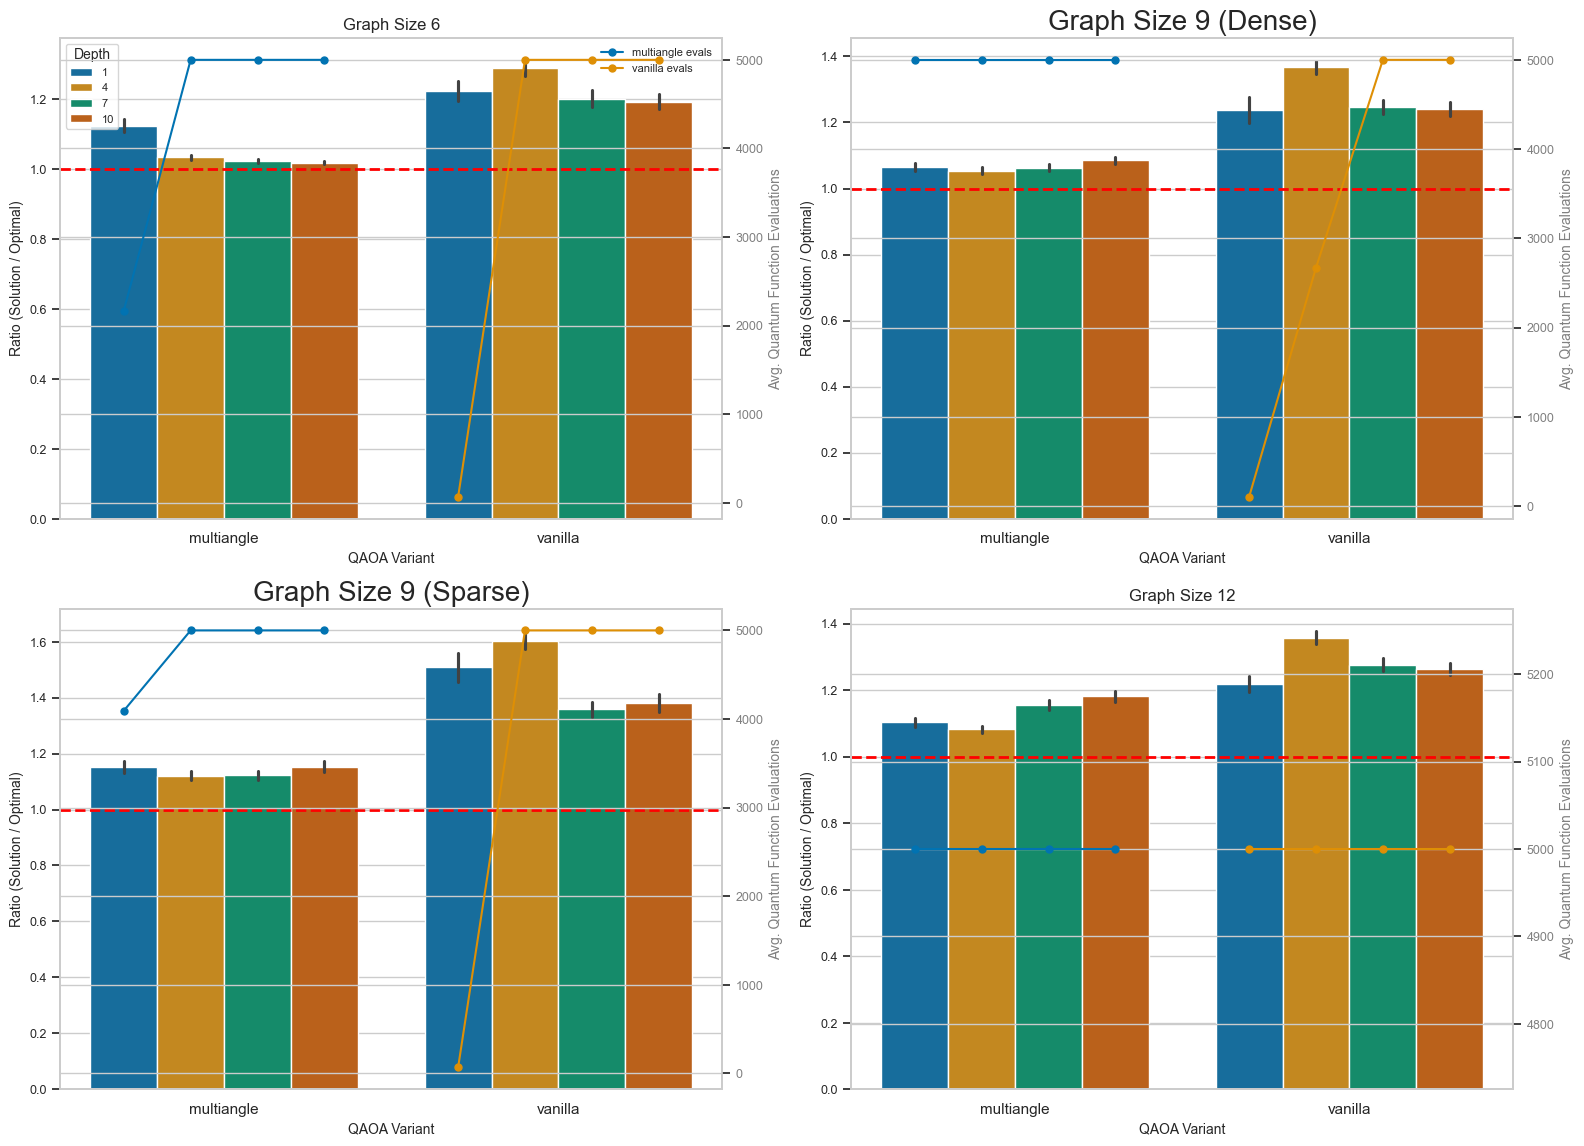

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_656\3231521353.py:130: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([lbl.get_text().capitalize() for lbl in axes[i].get_xticklabels()])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_656\3231521353.py:130: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([lbl.get_text().capitalize() for lbl in axes[i].get_xticklabels()])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_656\3231521353.py:130: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([lbl.get_text().capitalize() for lbl in axes[i].get_xticklabels()])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_656\3231521353.py:130: UserWarning: set_ticklabels() should only be used with

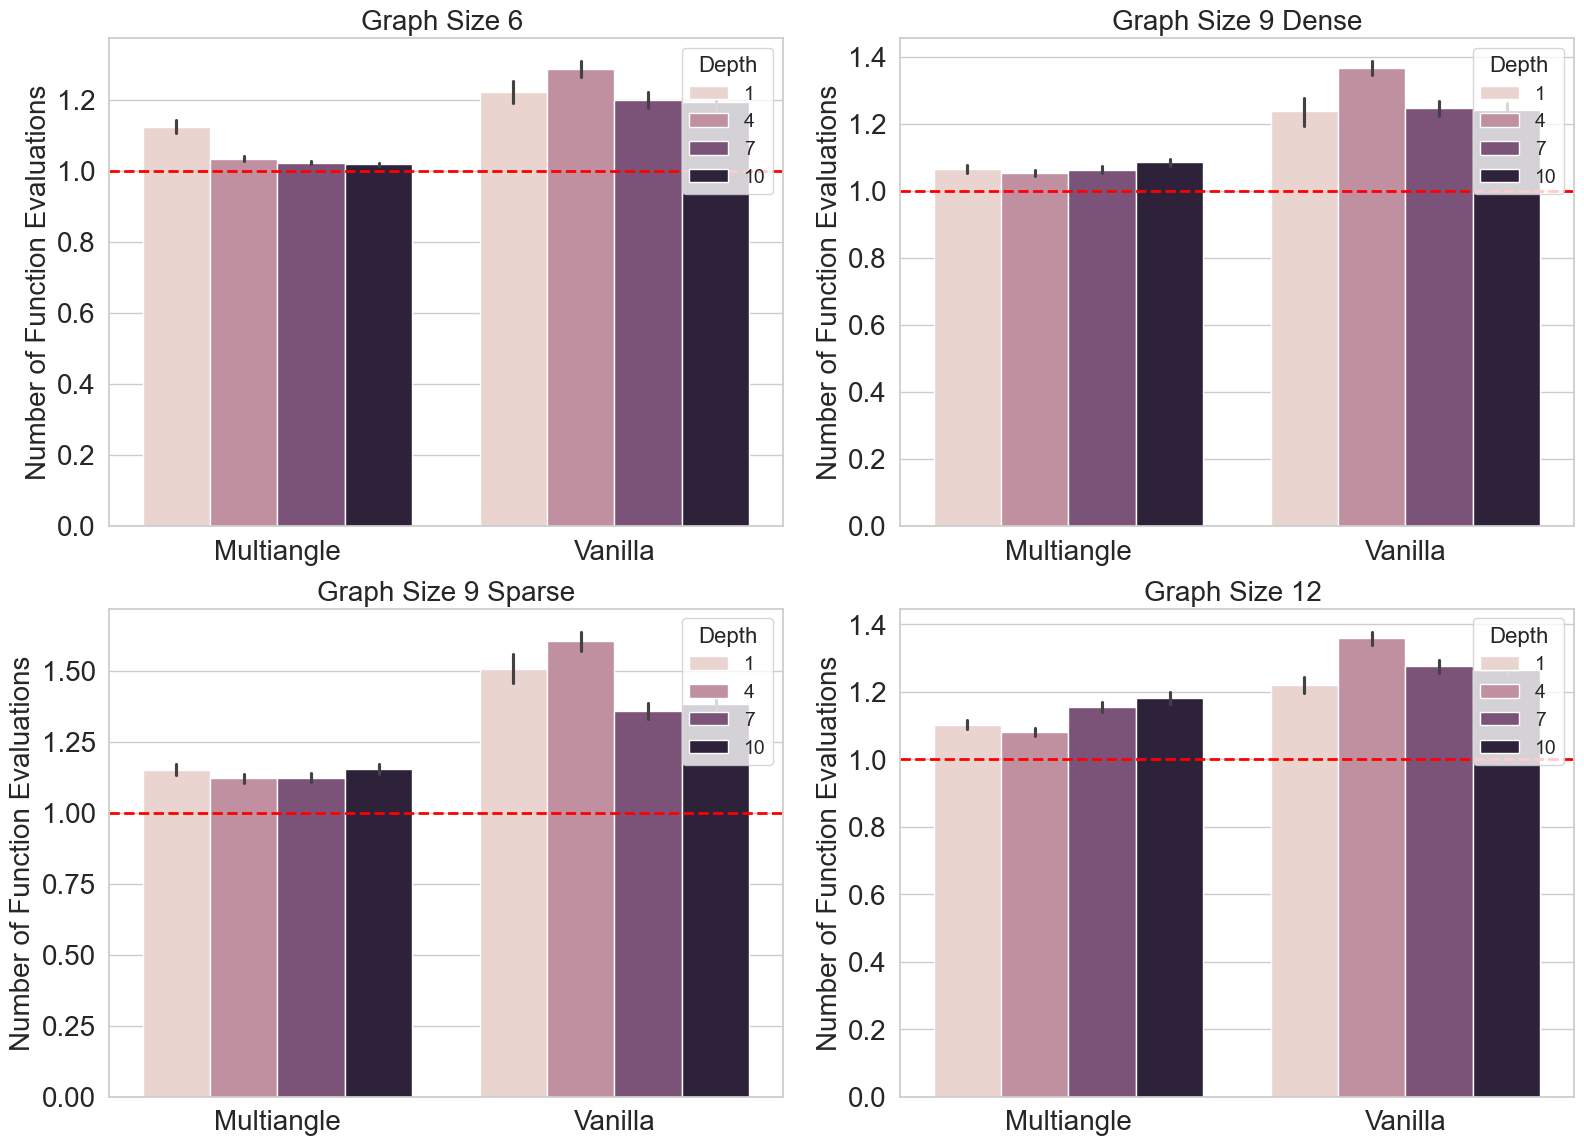

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a copy of results to work with
df = results.copy()
df = df[df['infeasible'] == False]

# Get unique graph names
graph_names = df['graph_name'].unique()



# Now create a plot showing function evaluations as well
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, graph in enumerate(graph_names):
    # Filter data for this graph
    graph_df = df[df['graph_name'] == graph]
    
    # Get graph size for the title
    graph_size = graph_df['graph_size'].iloc[0]
    
    # Create barplot for function evaluations
    sns.barplot(data=graph_df, x="qaoa_variant", y="ratio", hue="depth", ax=axes[i])
    
    # Customize plot
    axes[i].set_title(f"Graph Size {graph_size} ", fontsize=20)
    axes[i].set_ylabel("Number of Function Evaluations", fontsize=20)
    axes[i].tick_params(axis='both', labelsize=20)
    axes[i].axhline(y=1, color='red', linestyle='--', linewidth=2)
    # Adjust legend
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].set(xlabel=None)
    axes[i].legend(handles, labels, title="Depth", title_fontsize=16, fontsize=14, loc="upper right")
    axes[i].set_xticklabels([lbl.get_text().capitalize() for lbl in axes[i].get_xticklabels()])
axes[1].set_title(f"Graph Size {9} Dense", fontsize=20)
axes[2].set_title(f"Graph Size {9} Sparse", fontsize=20)
plt.tight_layout()
fig.subplots_adjust(top=0.93)  # Make room for the suptitle

# Save figure
plt.savefig('CS_allgraphs_comparison.pdf', bbox_inches='tight')

plt.show()


Statistics for Quantum Function Evaluations by Graph, QAOA Variant and Depth:

Graph 6 nodes:
  qaoa_variant  depth  count     mean      std   min      25%     50%  \
0   multiangle      1    250  4450.06  1160.93  1187  5000.00  5000.0   
1   multiangle      4    250  5000.00     0.00  5000  5000.00  5000.0   
2   multiangle      7    250  5000.00     0.00  5000  5000.00  5000.0   
3   multiangle     10    250  5000.00     0.00  5000  5000.00  5000.0   
4      vanilla      1    250   273.20   745.99    57    70.25    78.0   
5      vanilla      4    250  3965.11  1426.11   698  3037.50  5000.0   
6      vanilla      7    250  4714.18   696.78  1398  5000.00  5000.0   
7      vanilla     10    250  4996.51    55.21  4127  5000.00  5000.0   

       75%   max  
0  5000.00  5000  
1  5000.00  5000  
2  5000.00  5000  
3  5000.00  5000  
4   128.25  4429  
5  5000.00  5000  
6  5000.00  5000  
7  5000.00  5000  

Graph 9 nodes:
   qaoa_variant  depth  count     mean     std   min      25%

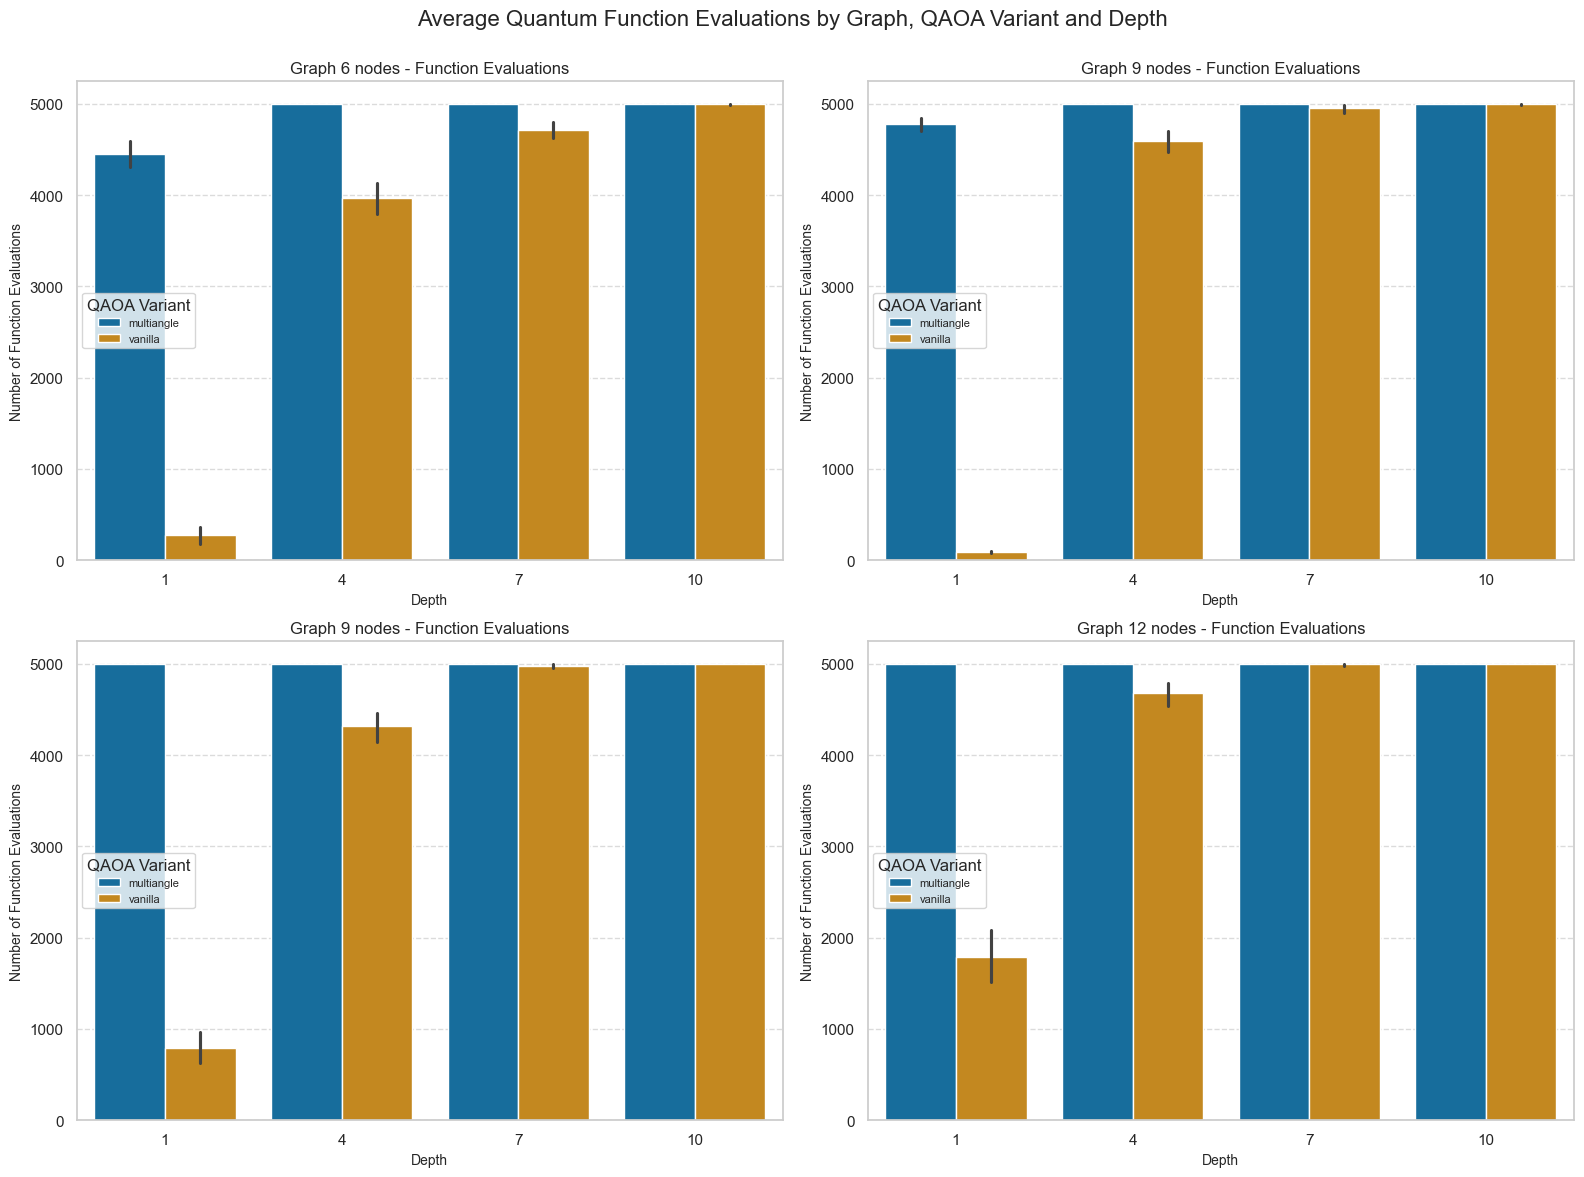

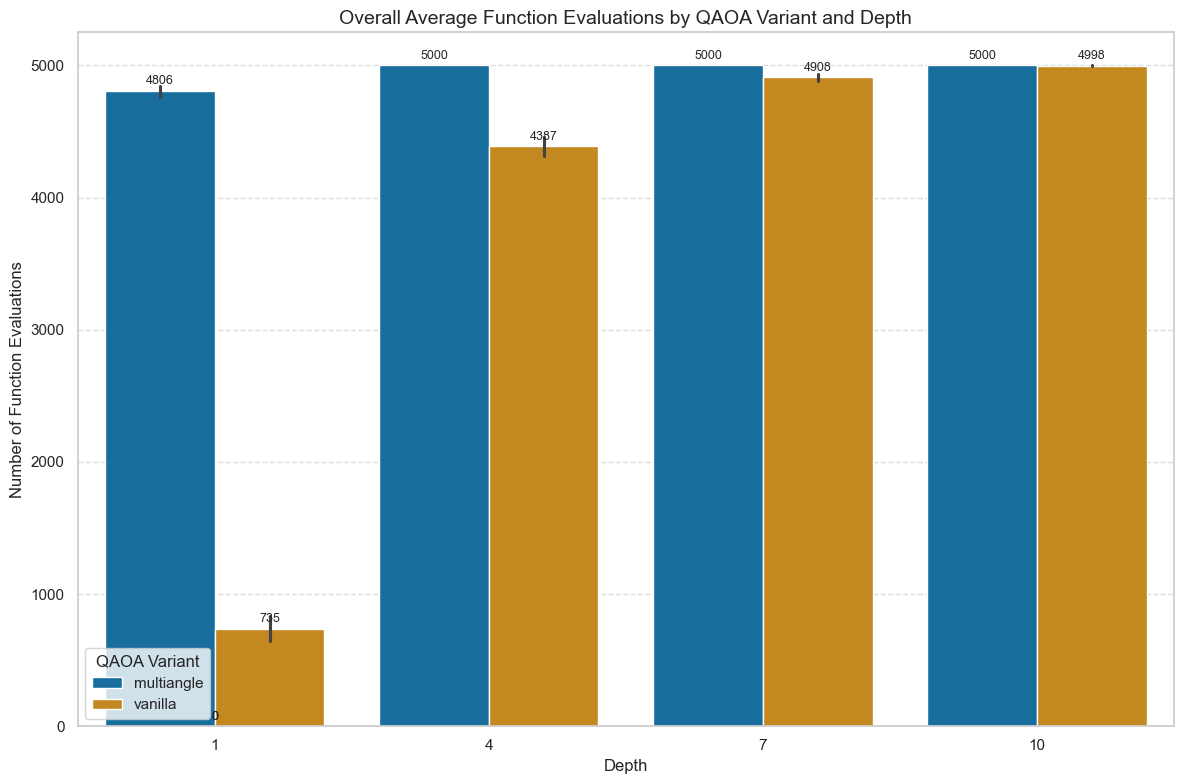

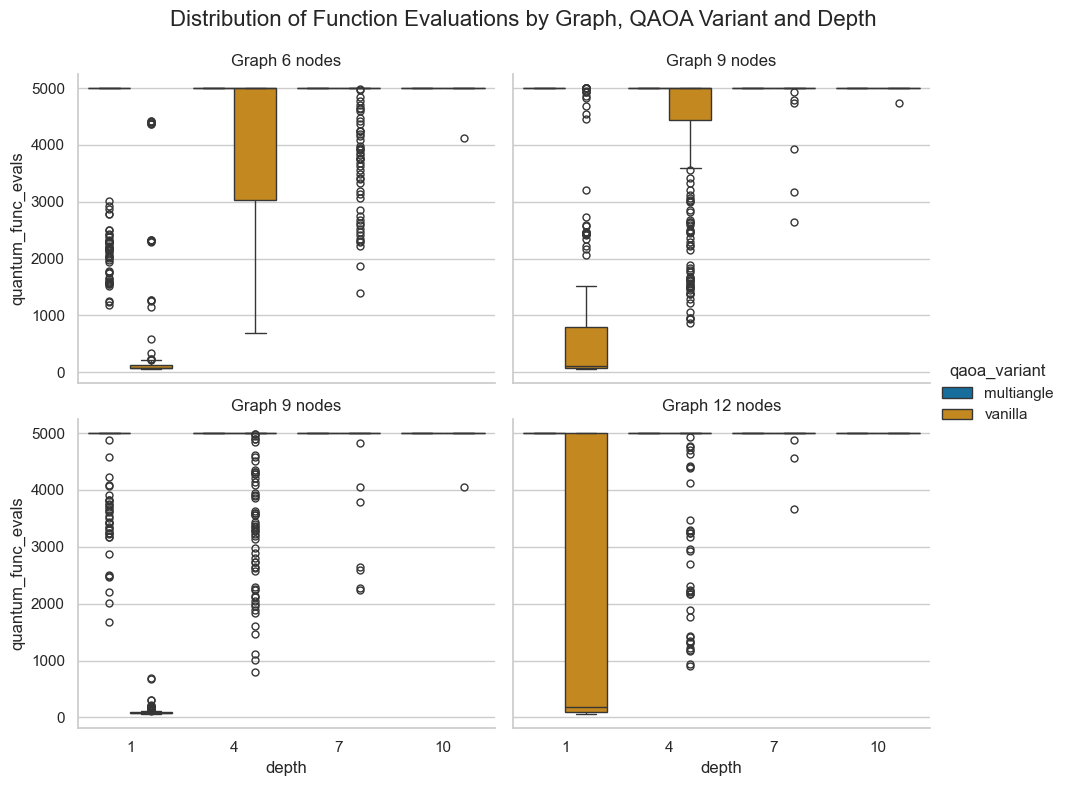

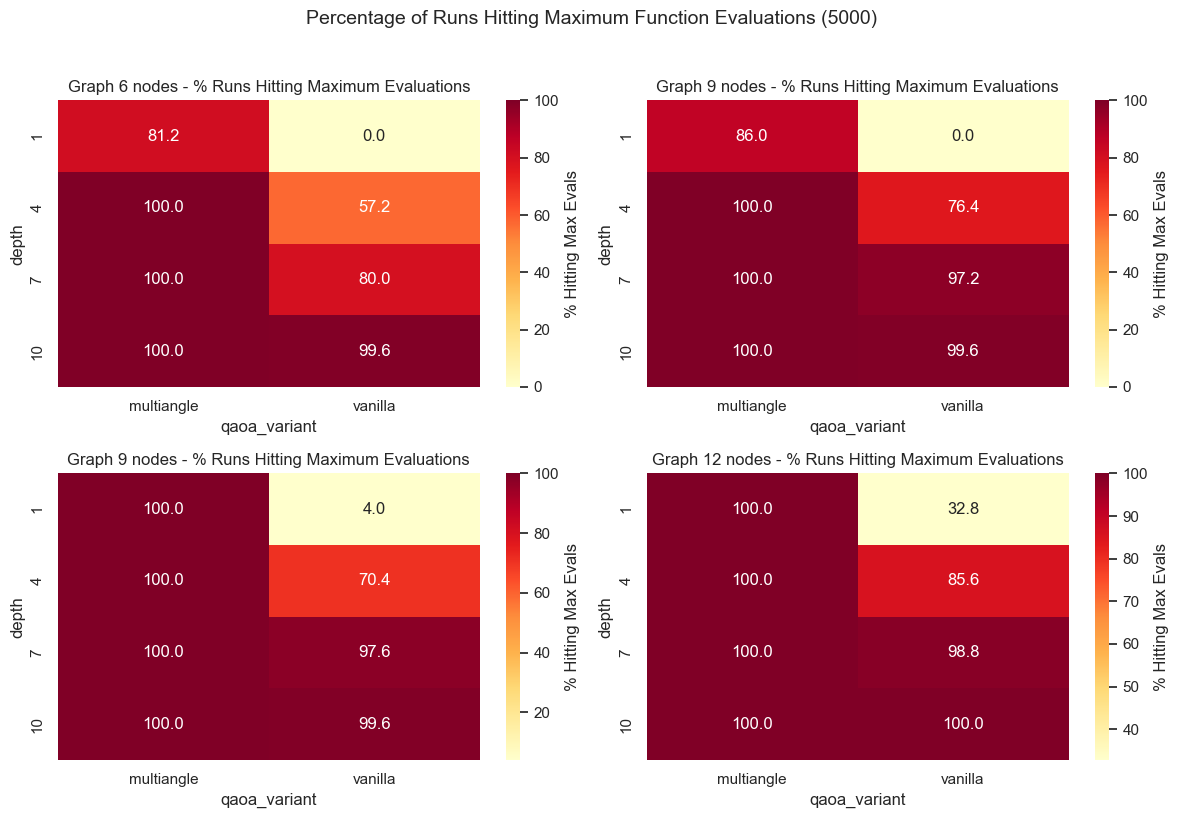


Percentage of Runs Hitting Maximum Function Evaluations (5000):
graph_name          Graph 6 nodes  Graph 9 nodes  Graph 9 nodes  \
qaoa_variant depth                                                
multiangle   1               81.2           86.0          100.0   
             4              100.0          100.0          100.0   
             7              100.0          100.0          100.0   
             10             100.0          100.0          100.0   
vanilla      1                0.0            0.0            4.0   
             4               57.2           76.4           70.4   
             7               80.0           97.2           97.6   
             10              99.6           99.6           99.6   

graph_name          Graph 12 nodes  
qaoa_variant depth                  
multiangle   1               100.0  
             4               100.0  
             7               100.0  
             10              100.0  
vanilla      1                32.8  
     

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate statistics for quantum_func_evals grouped by qaoa_variant, depth, and graph_name
stats = results.groupby(['graph_name', 'qaoa_variant', 'depth'])['quantum_func_evals'].agg([
    'count', 'mean', 'std', 'min', 
    lambda x: x.quantile(0.25),  # 25% quartile
    lambda x: x.quantile(0.5),   # median/50% quartile
    lambda x: x.quantile(0.75),  # 75% quartile
    'max'
]).reset_index()

# Rename the lambda function columns to more readable names
stats = stats.rename(columns={
    '<lambda_0>': '25%',
    '<lambda_1>': '50%',
    '<lambda_2>': '75%'
})

# Create a more detailed summary with formatted output
summary_df = stats.copy()
summary_df['mean'] = summary_df['mean'].round(2)
summary_df['std'] = summary_df['std'].round(2)

# Get human-readable graph names for display
graph_sizes = {}
for g_name in summary_df['graph_name'].unique():
    # Extract the graph size from the results DataFrame
    size = results[results['graph_name'] == g_name]['graph_size'].iloc[0]
    graph_sizes[g_name] = f"Graph {size} nodes"

# Print the statistics
print("Statistics for Quantum Function Evaluations by Graph, QAOA Variant and Depth:")
for graph_name in summary_df['graph_name'].unique():
    print(f"\n{graph_sizes[graph_name]}:")
    graph_data = summary_df[summary_df['graph_name'] == graph_name]
    print(graph_data[['qaoa_variant', 'depth', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])

# Create a more visual representation with seaborn - one plot per graph
plt.figure(figsize=(16, 12))
for i, graph_name in enumerate(summary_df['graph_name'].unique()):
    plt.subplot(2, 2, i+1)
    graph_data = results[results['graph_name'] == graph_name]
    sns.barplot(data=graph_data, x='depth', y='quantum_func_evals', hue='qaoa_variant')
    plt.title(f'{graph_sizes[graph_name]} - Function Evaluations', fontsize=12)
    plt.xlabel('Depth', fontsize=10)
    plt.ylabel('Number of Function Evaluations', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='QAOA Variant', fontsize=8)
    plt.tight_layout()

plt.subplots_adjust(top=0.92)
plt.suptitle('Average Quantum Function Evaluations by Graph, QAOA Variant and Depth', fontsize=16)
plt.savefig('func_evals_by_graph.pdf', bbox_inches='tight')
plt.show()

# Combined plot for overall comparison
plt.figure(figsize=(12, 8))
sns.barplot(data=results, x='depth', y='quantum_func_evals', hue='qaoa_variant')
plt.title('Overall Average Function Evaluations by QAOA Variant and Depth', fontsize=14)
plt.xlabel('Depth', fontsize=12)
plt.ylabel('Number of Function Evaluations', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='QAOA Variant')

# Add value labels on top of bars
for i, bar in enumerate(plt.gca().patches):
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        bar.get_height() + 50,
        f'{bar.get_height():.0f}',
        ha='center',
        fontsize=9
    )

plt.tight_layout()
plt.savefig('overall_func_evals.pdf', bbox_inches='tight')
plt.show()

# Create faceted boxplot for detailed distribution analysis
g = sns.catplot(
    data=results, 
    x='depth', 
    y='quantum_func_evals', 
    hue='qaoa_variant',
    col='graph_name',
    col_wrap=2,
    kind='box',
    height=4,
    aspect=1.2
)

# Update titles with graph sizes
for i, ax in enumerate(g.axes.flat):
    graph_name = list(graph_sizes.keys())[i]
    ax.set_title(graph_sizes[graph_name])
    
g.fig.suptitle('Distribution of Function Evaluations by Graph, QAOA Variant and Depth', fontsize=16)
g.fig.subplots_adjust(top=0.90)
plt.savefig('func_evals_distribution.pdf', bbox_inches='tight')
plt.show()

# Calculate percentage of runs that hit maximum evaluations (5000)
max_evals_df = results.copy()
max_evals_df['hit_max'] = max_evals_df['quantum_func_evals'] == 5000

# Group by graph, variant and depth and calculate percentage
max_evals_pct = max_evals_df.groupby(['graph_name', 'qaoa_variant', 'depth'])['hit_max'].mean() * 100
max_evals_pct = max_evals_pct.reset_index().rename(columns={'hit_max': 'pct_max_evals'})

# Create a bar plot showing percentage of runs hitting max evaluations
plt.figure(figsize=(12, 8))
for i, graph in enumerate(graph_sizes.keys()):
    plt.subplot(2, 2, i+1)
    graph_data = max_evals_pct[max_evals_pct['graph_name'] == graph]
    
    # Plot heatmap-like grid
    pivot = graph_data.pivot(index='depth', columns='qaoa_variant', values='pct_max_evals')
    sns.heatmap(pivot, annot=True, cmap='YlOrRd', fmt='.1f', cbar_kws={'label': '% Hitting Max Evals'})
    
    plt.title(f'{graph_sizes[graph]} - % Runs Hitting Maximum Evaluations')
    plt.tight_layout()

plt.suptitle('Percentage of Runs Hitting Maximum Function Evaluations (5000)', y=1.02, fontsize=14)
plt.tight_layout()
plt.savefig('max_evals_percentage.pdf', bbox_inches='tight')
plt.show()

# Summarize in table format for presentation
max_evals_summary = max_evals_pct.pivot_table(
    index=['qaoa_variant', 'depth'], 
    columns='graph_name', 
    values='pct_max_evals'
).round(1)

# Rename columns to be more readable
max_evals_summary = max_evals_summary.rename(columns=graph_sizes)
print("\nPercentage of Runs Hitting Maximum Function Evaluations (5000):")
print(max_evals_summary)